<a href="https://colab.research.google.com/github/hprasad99/Deep-Learning/blob/master/IMDB_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMDB**

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.text import *

**Preparing the data**

The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) has been curated by Andrew Maas et al. and contains a total of 1,00,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaining 50,000 is an additional unlabelled data.

We are considering sample data before going over the full dataset

In [8]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [9]:
df = pd.read_csv(path/'texts.csv')

In [10]:
df

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False
...,...,...,...
995,negative,There are many different versions of this one ...,True
996,positive,Once upon a time Hollywood produced live-actio...,True
997,negative,Wenders was great with Million $ Hotel.I don't...,True
998,negative,Although a film with Bruce Willis is always wo...,True


In [11]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [12]:
doc(TextDataBunch.from_csv)

In [13]:
data_lm = TextDataBunch.from_csv(path,'texts.csv')

By executing above line a process was launched. Images can be fed (almost)directly into a model because they are just pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two different steps: tokenization and numericalization. TextDataBunch does all of that.

In [14]:
data_lm.save()

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [15]:
data = load_data(path)

In [16]:
data

TextClasDataBunch;

Train: LabelList (799 items)
x: TextList
xxbos xxmaj this was a great movie that had a lot of under lying issues . xxmaj it dealt with issues of xxunk and class . xxmaj but , it also had a message of knowing yourself and taking responsibility for yourself . xxmaj this movie was very deep it gave the message of that you and only you can control your destiny . xxmaj it also showed that knowing yourself and being comfortable with who you are is the only way you will ever fit into society . xxmaj what others think of you is not important . i believe this movie did a wonderful job of showing it . xxmaj the actors i think were able to convey each character wonderfully . i just thought it was amazing how deep this movie really was . xxmaj at a just xxunk look you would n't see how deep the movie is , but on further look you see the xxunk meaning of the movie .,xxbos a xxmaj give this xxmaj movie a 10 / 10 because it deserves a 10 / 10 . xxmaj two of the best actors of thei

In [17]:
data = load_data(path)

In [18]:
doc(load_data)

**Tokenization**

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:
*   we need to take care of punctuations 
*   some words are contractions of two words, like isn't or don't
*   we may need to clean some parts of our texts, if there's HTML code for instance.






In [19]:
data = TextClasDataBunch.from_csv(path,'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuations symbols:


*   the "s" are grouped together in one token
*   the contractions are separated like this: "did", "n't"
*   content has been cleaned for any HTML symbol and lower cased
*   there are several special tokens (all those that begin by xx), to replace unknown tokens

**Numericalization**

Once we have extracted tokens from our texts, we convert to integers by creating a list of all words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token UNK.





In [20]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [21]:
data.train_ds[0][0]

Text [   2    5    9 1375 ...   13  652   32   11]

In [22]:
data.train_ds[0][0].data[:10]

array([   2,    5,    9, 1375, 1466,   16,   29,  166,  104,   52])

**With the data block API**



In [23]:
data = (TextList.from_csv(path,'texts.csv',cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [24]:
data

TextClasDataBunch;

Train: LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to watch , because the

**Language Model**

In [25]:
bs = 48

In [26]:
path  = untar_data(URLs.IMDB)
path.ls()

In [27]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg')]

In [28]:
data_lm = (TextList.from_folder(path)
                    .filter_by_folder(include=['train','test','unsup'])
                    .split_by_rand_pct(0.1)
                    .label_for_lm()
                    .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [29]:
data_lm.show_batch()

idx,text
0,"on the fact that he was gay , unable to face up to the fact that it was her rejection of him that helped him along . xxmaj her second husband ( xxmaj steven xxmaj lang ) , not the boy 's father , is a little more lenient in his views , and this causes conflict . xxmaj when it 's obvious that two of the men at xxmaj"
1,"myself , these reference points always prove interesting ( and ' xxmaj baseball xxmaj bugs ' includes my favourite regularly used saying , "" xxmaj was this trip really necessary ? "" , which always cracks me up ) but to most people they will prove perplexing and the fact that the cartoon ends with one of these forgotten catchphrases makes for a somewhat anticlimactic finale . xxmaj nevertheless ,"
2,"are both films xxmaj yuzna produced but not directed himself . xxbos i love movies ... a lot . i 've seen thousands of movies ( that 's not an exaggeration ) and i 've tried to see all the "" important "" films critics rave about . xxmaj some of them xxup have been great but others like "" xxmaj wild xxmaj strawberries "" and this are just meandering"
3,"the best films made in the 1980 's . xxmaj the film is astounding . xxmaj it is in fact very depressing , but shows the cruel and unusual ways of the xxmaj san xxmaj salvadorian government in the 1970 's . xxmaj the film is violent and sometimes disturbing . i showed this film to my freshman classes at school , and they were somewhat disturbed . xxmaj the"
4,"out of 10 is clearly undeserved praise and might ( horror of horrors ) encourage this egregious blight on cinema to direct another movie . - i ( as i 'm sure most other people will ) shudder at the thought . \n \n xxmaj somehow , i imagine this breathtakingly inadequate director could even mess up sweeping the streets , so i wo n't suggest she takes this"


In [30]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

In [32]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


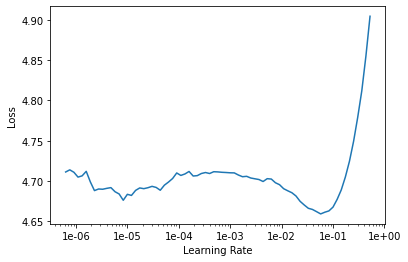

In [33]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
#learn.save('fit_head')

In [ ]:
#learn.load('fit_head')

In [ ]:
#learn.unfreeze()

In [ ]:
#learn.fit_one_cycle(10,1e-3,moms=(0.8,0.7))